In [1]:
import os
import glob
import numpy as np

import logging
from src.config import output_data_dir

import matplotlib.pyplot as plt

import re
from sklearn.feature_selection import f_regression, mutual_info_regression

def find_csv_filenames(path_to_dir, suffix=".csv" ):
    filenames = os.listdir(path_to_dir)
    return [ filename for filename in filenames if filename.endswith( suffix ) ]


csv_dir = os.path.join(output_data_dir, "twoballs\imgs")

VAR_NAMES = ['A0', 'A1', 'L0', 'L1']
EPOCH_IDX = dict({1:0, 2:1, 5:2, 10:3, 20:4, 50:5})

EPOCH = np.zeros((4,4,18))
MI = np.zeros((4,4,18))
      
def handle(data, epoch, nround):
    print("epoch %d, round %d" % (epoch, nround))
    N = data.shape[1]
    assert(N == 4)
    
    k = EPOCH_IDX[epoch] * 3 + nround
    
    for i in range(N):
        mi = mutual_info_regression(data, (data[:,i]))
        mi /= np.max(mi)
  
        for j in range(N):
            EPOCH[i, j, k] = epoch
            MI[i, j, k] = mi[j]
    
for fname in find_csv_filenames(csv_dir):
    fpath = os.path.join(csv_dir, fname)

    logging.info("processing fname=%s" % fpath)
    
    my_data = np.genfromtxt(fpath, delimiter=',')
    m = re.match(r'epochs_(\d+)-(\d+).csv', fname)
    if not m:
        logger.error("file name %s does not match pattern" % fpath)
        continue
        
    epoch, round = m.group(1), m.group(2)
    handle(my_data, int(epoch), int(round))
    
print(MI)

2021-03-07 02:39:43,046 - root - INFO - processing fname=C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs\imgs\epochs_1-0.csv


epoch 1, round 0


2021-03-07 02:39:45,386 - root - INFO - processing fname=C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs\imgs\epochs_1-1.csv


epoch 1, round 1


2021-03-07 02:39:47,683 - root - INFO - processing fname=C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs\imgs\epochs_1-2.csv


epoch 1, round 2


2021-03-07 02:39:50,016 - root - INFO - processing fname=C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs\imgs\epochs_10-0.csv


epoch 10, round 0


2021-03-07 02:39:52,263 - root - INFO - processing fname=C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs\imgs\epochs_10-1.csv


epoch 10, round 1


2021-03-07 02:39:54,505 - root - INFO - processing fname=C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs\imgs\epochs_10-2.csv


epoch 10, round 2


2021-03-07 02:39:56,798 - root - INFO - processing fname=C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs\imgs\epochs_2-0.csv


epoch 2, round 0


2021-03-07 02:39:59,065 - root - INFO - processing fname=C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs\imgs\epochs_2-1.csv


epoch 2, round 1


2021-03-07 02:40:01,363 - root - INFO - processing fname=C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs\imgs\epochs_2-2.csv


epoch 2, round 2


2021-03-07 02:40:03,622 - root - INFO - processing fname=C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs\imgs\epochs_20-0.csv


epoch 20, round 0


2021-03-07 02:40:05,857 - root - INFO - processing fname=C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs\imgs\epochs_20-1.csv


epoch 20, round 1


2021-03-07 02:40:08,096 - root - INFO - processing fname=C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs\imgs\epochs_20-2.csv


epoch 20, round 2


2021-03-07 02:40:10,388 - root - INFO - processing fname=C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs\imgs\epochs_5-0.csv


epoch 5, round 0


2021-03-07 02:40:12,648 - root - INFO - processing fname=C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs\imgs\epochs_5-1.csv


epoch 5, round 1


2021-03-07 02:40:14,904 - root - INFO - processing fname=C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs\imgs\epochs_5-2.csv


epoch 5, round 2


2021-03-07 02:40:17,181 - root - INFO - processing fname=C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs\imgs\epochs_50-0.csv


epoch 50, round 0


2021-03-07 02:40:19,462 - root - INFO - processing fname=C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs\imgs\epochs_50-1.csv


epoch 50, round 1


2021-03-07 02:40:21,789 - root - INFO - processing fname=C:\Users\alexa\Documents\dvp\autoenc2\data\output\twoballs\imgs\epochs_50-2.csv


epoch 50, round 2
[[[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
   1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
   1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
   1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
   1.00000000e+00 1.00000000e+00]
  [3.32299572e-04 3.28468459e-04 2.40433869e-04 2.10496933e-04
   0.00000000e+00 1.96586284e-04 1.49290743e-04 8.24753640e-05
   3.46301805e-04 1.46802630e-04 1.97407573e-04 1.08976861e-04
   0.00000000e+00 1.37367017e-04 3.73383520e-04 9.08480142e-05
   1.19703857e-04 2.09536350e-04]
  [1.75738589e-03 2.61214278e-04 4.77944803e-04 2.07410004e-01
   6.36846152e-03 1.75179471e-01 2.12089229e-01 2.40698522e-01
   1.99084607e-01 1.32566472e-01 1.40852674e-01 2.19611929e-01
   1.97182345e-01 1.15401018e-01 3.35028587e-01 1.29520448e-01
   1.26220596e-01 1.83045438e-01]
  [3.32684702e-03 4.41048523e-04 0.00000000e+00 1.46956713e-01
   7.37999785e-03 1.63514470e-01 1.83056819e-01 1.72459110e-0

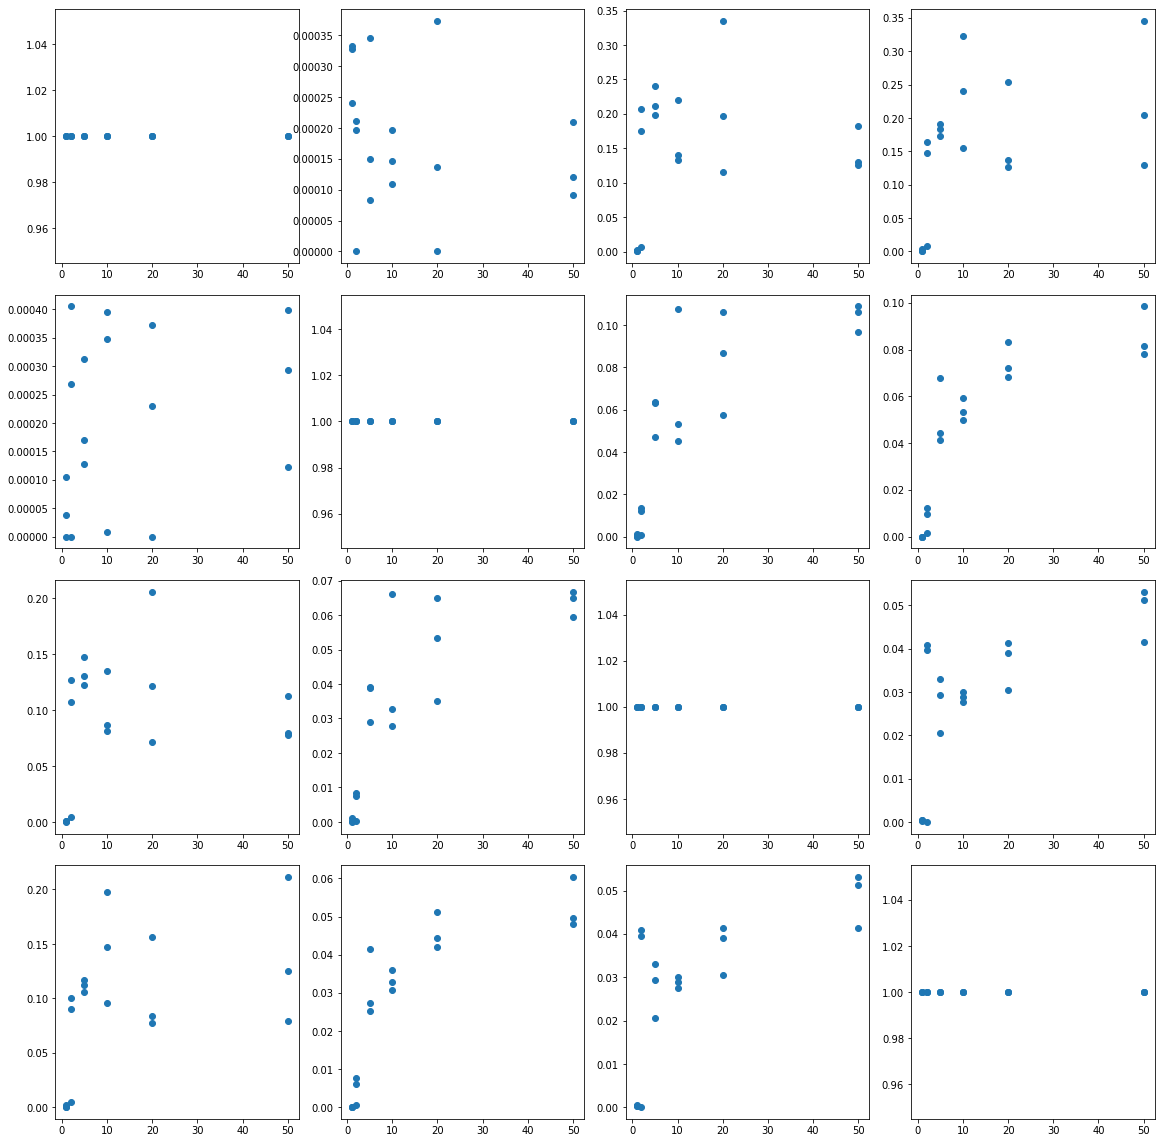

In [7]:
fig, axs = plt.subplots(4, 4, figsize=(16,16))
fig.tight_layout()

for i in range(4):
    for j in range(4):
        axs[i,j].scatter(EPOCH[i,j], MI[i,j])
    